
# Project: Investigate a Dataset - [NO-show appiontments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

NO-show appointments :
This data that I have selected for analysis, This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


### Question(s) for Analysis

- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


UsageError: Line magic function `%` not found.


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

# Show some of raw data :

In [5]:
df = pd.read_csv('rawdataforproject.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Explore if we have misssing values ? 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Explore if we have duplicate values ?

In [7]:
df.duplicated().any()

False

# show some statistics about data :

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# I noticed unexpected min value in Age (-1), So I will make sure there is not another one : 

In [9]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

#  I noticed strange max value in Handcap (4), So I recognize its values : 

In [10]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

# Show histograms : 

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

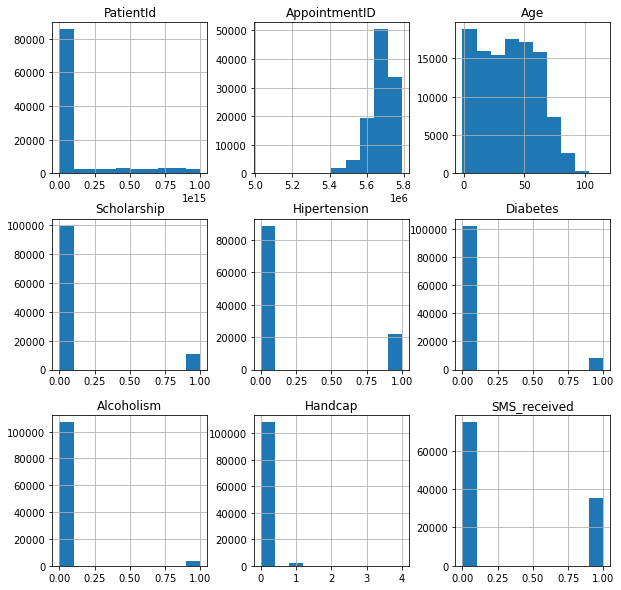

In [11]:
df.hist(figsize=(10,10))

# From Data Wrangling : 

- (PatientId - AppointmentID - ScheduledDay - AppointmentDay ), these columns I will not use it in my analysis, so I will drop   them.
- NO-show column, this name will cause errors, I will rename it.
- We do not have missing values. 
- We do not have duplicate raws.
- We should drop the unexpected value of Age (-1).
- After show the unique values of Handcap, the max value (4) is not strange so, I will leave it.


### Data Cleaning

In [12]:
# Remove columns I found them useless (PatientId - AppointmentID - ScheduledDay - AppointmentDay)
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

# Show dataFrame for checking 
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# Rename No-show coulmn 
df.rename(columns={'No-show':'No_show'}, inplace=True)

#Show dataFrame for checking
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# Show rows that age = -1 
wrong_age = df.query('Age == -1') 
wrong_age

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
# Remove rows that age = -1
df.drop(99832, inplace=True)

# Check 
df.shape

(110526, 10)

<a id='eda'></a>
## Exploratory Data Analysis

In [16]:
# Create mask for No_show
present = df.No_show == 'No'   # showed up to appointment
absent = df.No_show == 'Yes'   # did not show up to appointmentb

In [17]:
# Method to plot by pie :
def pie (col) :
    df[col].value_counts().plot(kind='pie')

In [18]:
df['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

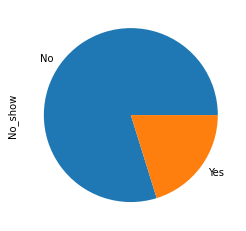

In [20]:
pie('No_show')

In [21]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

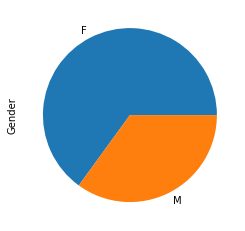

In [22]:
pie('Gender')

# Explore the relation between Gender and show up : 

In [23]:
df.Gender[present].value_counts()

F    57245
M    30962
Name: Gender, dtype: int64

In [24]:
df.Gender[absent].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

# There is not relation between Gender and Show up :
- Females show up more because they are more than males in number.

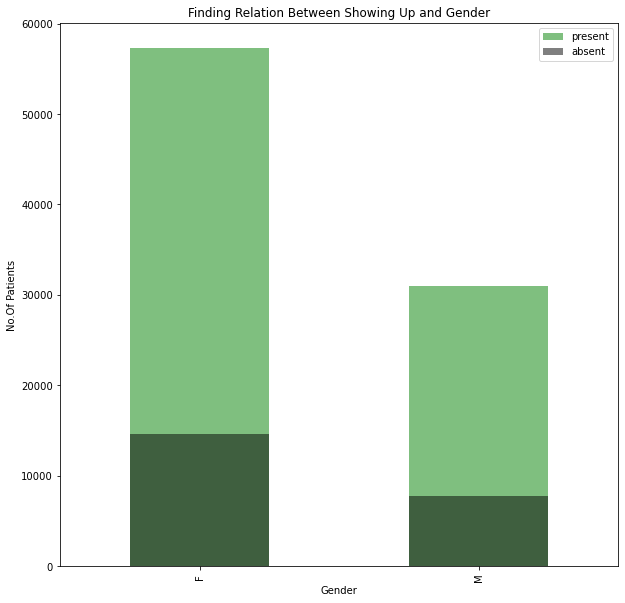

In [25]:
# Visualize the result 
plt.figure(figsize=(10,10))
df.Gender[present].value_counts().plot(kind='bar', alpha=.5, color='green', label='present')
df.Gender[absent].value_counts().plot(kind='bar', alpha=.5, color='black', label='absent')
plt.legend();
plt.title('Finding Relation Between Showing Up and Gender')
plt.ylabel('No.Of Patients')
plt.xlabel('Gender');

# Explore when patients recevied SMS, they showed up or not ?

In [26]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

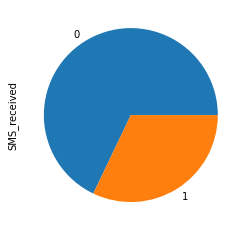

In [27]:
pie('SMS_received')

In [28]:
# First for patients who showed up 
df.SMS_received[present].value_counts()

0    62509
1    25698
Name: SMS_received, dtype: int64

In [29]:
# Second for patients who did not show up 
df.SMS_received[absent].value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

# There is not clear relation between Show up and SMS_received

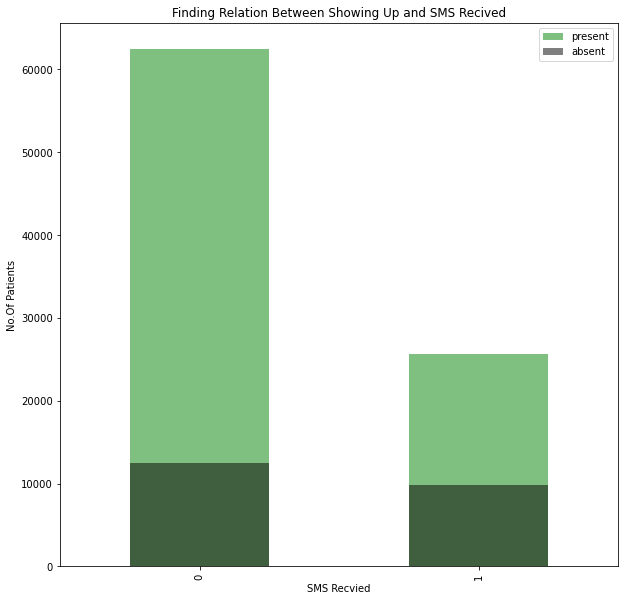

In [30]:
# Visualize the result 
plt.figure(figsize=(10,10))
df.SMS_received[present].value_counts().plot(kind='bar', alpha=.5, color='green', label='present')
df.SMS_received[absent].value_counts().plot(kind='bar', alpha=.5, color='black', label='absent')
plt.legend();
plt.title('Finding Relation Between Showing Up and SMS Recived')
plt.ylabel('No.Of Patients')
plt.xlabel('SMS Recvied');

# Explore the relation between Scholarship and show up : 

In [31]:
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

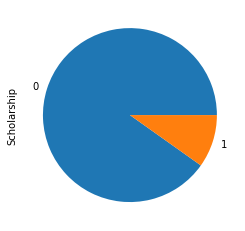

In [32]:
pie('Scholarship')

In [33]:
# The number of patients who showed up with scholarship or with it 
df.Scholarship[present].value_counts()

0    79924
1     8283
Name: Scholarship, dtype: int64

In [34]:
# The number of patients who did not show up with scholarship or with it 
df.Scholarship[absent].value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

# There is not clear relation between Scholarship and Show up

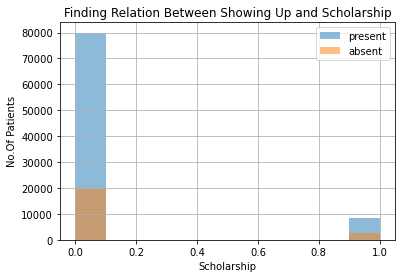

In [35]:
df.Scholarship[present].hist(alpha=.5, bins=10, label='present')
df.Scholarship[absent].hist(alpha=.5, bins=10, label='absent')
plt.legend();
plt.title('Finding Relation Between Showing Up and Scholarship')
plt.ylabel('No.Of Patients')
plt.xlabel('Scholarship');

# Explore the relation between Hipertension and show up :

In [36]:
df['Hipertension'].value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

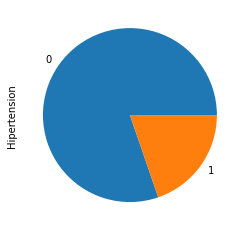

In [37]:
pie('Hipertension')

In [38]:
df.Hipertension[present].value_counts()

0    70178
1    18029
Name: Hipertension, dtype: int64

In [39]:
df.Hipertension[absent].value_counts()

0    18547
1     3772
Name: Hipertension, dtype: int64

# There is not clear relation between Hipertension and show up

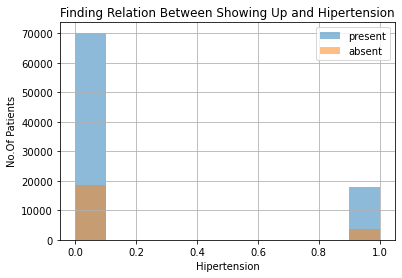

In [40]:
df.Hipertension[present].hist(alpha=.5, bins=10, label='present')
df.Hipertension[absent].hist(alpha=.5, bins=10, label='absent')
plt.legend();
plt.title('Finding Relation Between Showing Up and Hipertension')
plt.ylabel('No.Of Patients')
plt.xlabel('Hipertension');

# Explore the relation between Diabetes and show up :

In [41]:
df['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

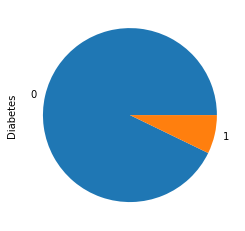

In [42]:
pie('Diabetes')

In [43]:
df.Diabetes[present].value_counts()

0    81694
1     6513
Name: Diabetes, dtype: int64

In [44]:
df.Diabetes[absent].value_counts()

0    20889
1     1430
Name: Diabetes, dtype: int64

# There is not clear relation between Diabetes and show up

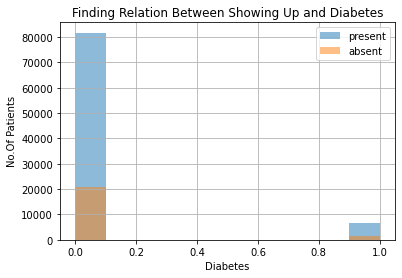

In [45]:
df.Diabetes[present].hist(alpha=.5, bins=10, label='present')
df.Diabetes[absent].hist(alpha=.5, bins=10, label='absent')
plt.legend();
plt.title('Finding Relation Between Showing Up and Diabetes')
plt.ylabel('No.Of Patients')
plt.xlabel('Diabetes');

# Explore the relation between Alcoholism and show up :

In [46]:
df['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

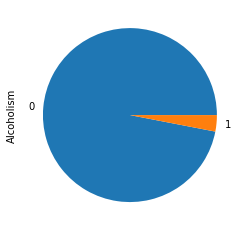

In [47]:
pie("Alcoholism")

In [48]:
df.Alcoholism[present].value_counts()

0    85524
1     2683
Name: Alcoholism, dtype: int64

In [49]:
df.Alcoholism[absent].value_counts()

0    21642
1      677
Name: Alcoholism, dtype: int64

# There is not clear relation between Alcoholism and show up

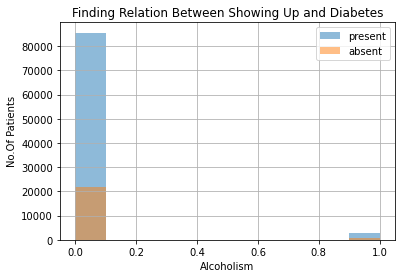

In [50]:
df.Alcoholism[present].hist(alpha=.5, bins=10, label='present')
df.Alcoholism[absent].hist(alpha=.5, bins=10, label='absent')
plt.legend();
plt.title('Finding Relation Between Showing Up and Diabetes')
plt.ylabel('No.Of Patients')
plt.xlabel('Alcoholism');

# Explore the relation between Handcap and show up :

In [51]:
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [52]:
df.Handcap[present].value_counts()

0    86373
1     1676
2      146
3       10
4        2
Name: Handcap, dtype: int64

In [53]:
df.Handcap[absent].value_counts()

0    21912
1      366
2       37
3        3
4        1
Name: Handcap, dtype: int64

# There is not clear relation between Handcap and show up

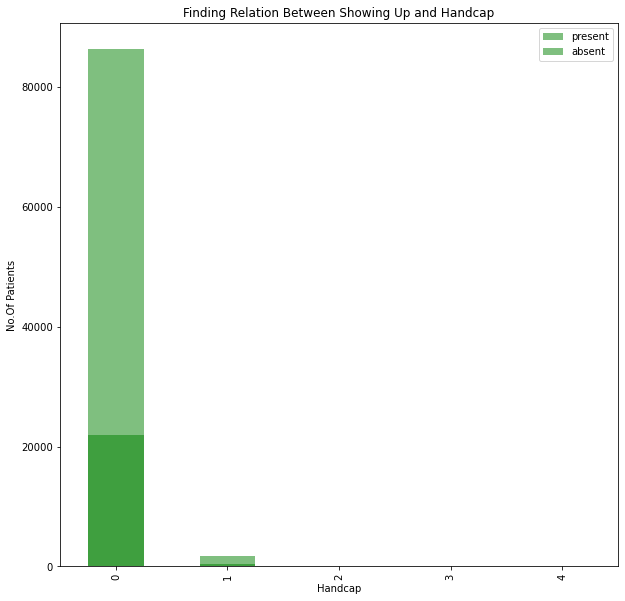

In [54]:
plt.figure(figsize=(10,10))
df.Handcap[present].value_counts().plot(kind='bar', alpha=.5, color='green', label='present')
df.Handcap[absent].value_counts().plot(kind='bar', alpha=.5, color='green', label='absent')
plt.legend()
plt.title('Finding Relation Between Showing Up and Handcap')
plt.ylabel('No.Of Patients')
plt.xlabel('Handcap');

# Explore the relation between Age and show up :

In [55]:
df.Age[present].value_counts()

0      2900
1      1858
52     1449
56     1372
2      1366
       ... 
98        5
100       4
102       2
115       2
99        1
Name: Age, Length: 103, dtype: int64

In [56]:
df.Age[absent].value_counts()

0      639
1      415
17     396
19     394
30     369
      ... 
95       6
115      3
97       2
98       1
96       1
Name: Age, Length: 100, dtype: int64

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


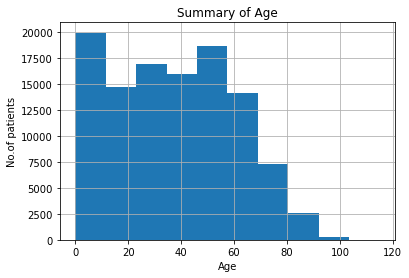

In [57]:
plot = df['Age'].hist()
plot.set_ylabel('No.of patients')
plot.set_xlabel('Age')
plot.set_title('Summary of Age')
pd.DataFrame(df['Age'].describe())

# There are two points here :
- Most of patients under the age of 13 showed up, this range had big number of patients
- Most of patients at the age of 50 to patients at the age of 70 , this range had patients showed up 

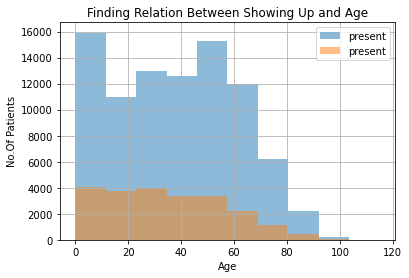

In [58]:
df.Age[present].hist(alpha=.5, bins=10, label='present')
df.Age[absent].hist(alpha=.5, bins=10, label='present')
plt.legend()
plt.title('Finding Relation Between Showing Up and Age')
plt.ylabel('No.Of Patients')
plt.xlabel('Age');

# Explore the relation between Neighbourhood and show up :

In [59]:
df.Neighbourhood[present].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

In [60]:
df.Neighbourhood[absent].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

# We have a traffic in JARDIM CAMBURY, the most show up in neighbourhoods

- MARIA ORTIZ, ITARAE and RESISTENCIA also had patients showed up 

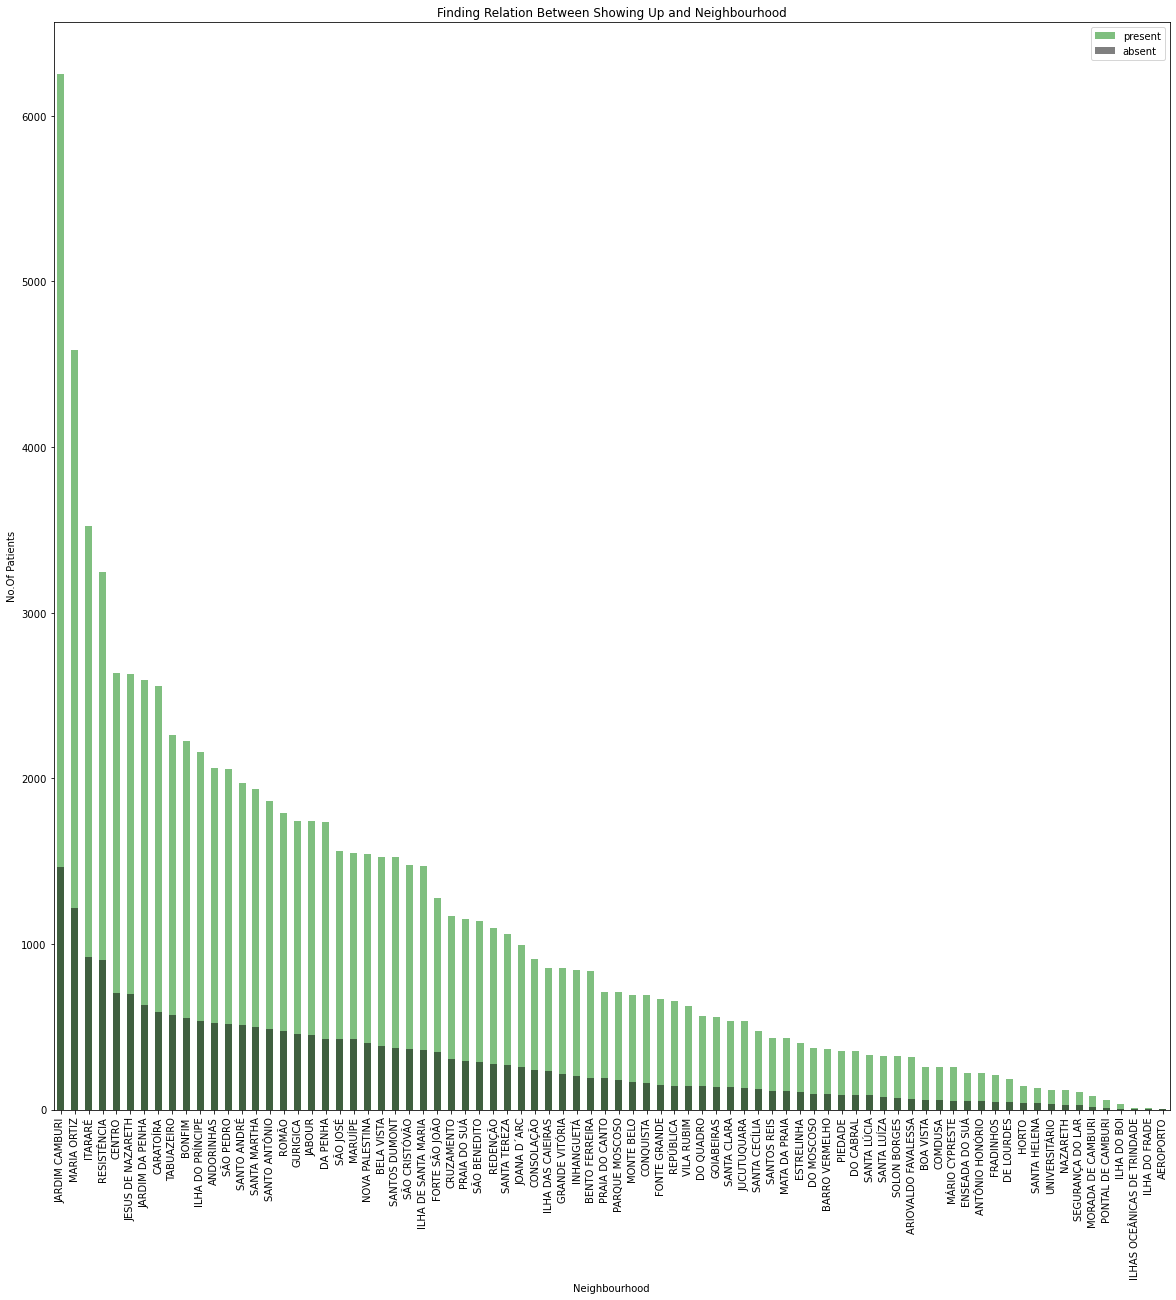

In [61]:
plt.figure(figsize=(20,20))
df.Neighbourhood[present].value_counts().plot(kind='bar', alpha=.5, label='present', color='green')
df.Neighbourhood[absent].value_counts().plot(kind='bar', alpha=.5, label='absent', color='black')
plt.legend()
plt.title('Finding Relation Between Showing Up and Neighbourhood')
plt.ylabel('No.Of Patients')
plt.xlabel('Neighbourhood')
plt.show();

# <a id='conclusions'></a>
## Conclusions
- There is not clear relation between Gender and Show up.
- There is not clear relation between SMS_recevied and Show up.
- There is not clear relation between Scholarship and Show up.
- There is not clear relation between Diabetes and Show up.
- There is not clear relation between Alocholism and Show up.
- There is not clear relation between Handcap and Show up.
- There is not clear relation between Hipertension and Show up.
- Age is an important factor that we can use it to predict whether patient will show up or not :
    - Most of patients under the age of 13 showed up, this range had big number of patients.
    - Most of patients at the age of 50 to patients at the age of 70 , this range had patients showed up.
- Neighbourhood also is an important factor that we can use it to predict whether patient will show up or not :
    - Neighbourhoods like (JARDIM CAMBURY - MARIA ORTIZ - ITARAE - RESISTENCIA) had most patient show up.  


### Limitations
- (Hipertension - Diabetes - Alcoholism - Handcap), These columns I expect that I can get useful conclusions from them but I     found them useless.
- Alcoholism : 
    I found patient in age of childhood in this column, this made me confused, I can not Determine if these rows are wrong or       not.


In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1